# 학습 및 검증

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly")

* 테스트용 데이터셋은 모델의 성능을 확인하는 데 사용
* 검증용 데이터셋의 크기는 전체 데이터셋의 일부를 활용(아래 예제는 20%)
* split_df의 매개변수 valid_p를 사용

In [2]:
df_train, df_val = m.split_df(df, valid_p=0.2)

print("Dataset size:", len(df))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 1462
Train dataset size: 1170
Validation dataset size: 292


* 검증은 훈련 중에 검증용 데이터셋을 fit 메서드에 전달하여 수행

In [3]:
metrics = m.fit(df_train, validation_df=df_val, progress=None)
metrics

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\user\anaconda3\Lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - C:\Users\user\anaconda3\Lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 18. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,33.481266,41.834885,0.432688,0.0,0,0.375038,0.0,37.669472,46.506714,0.374167,0.0
1,25.487751,31.872559,0.303169,0.0,1,0.266127,0.0,28.907738,35.556667,0.264896,0.0
2,18.467129,22.898184,0.192972,0.0,2,0.165173,0.0,20.641743,25.346600,0.164017,0.0
3,11.577470,13.883100,0.088056,0.0,3,0.083878,0.0,13.548951,16.802557,0.083442,0.0
4,8.015057,10.159159,0.047489,0.0,4,0.043719,0.0,9.214744,11.890175,0.043282,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105,7.229043,9.175197,0.039431,0.0,105,0.013785,0.0,4.579674,6.196955,0.013768,0.0
106,7.195328,9.163325,0.039312,0.0,106,0.013783,0.0,4.575279,6.174449,0.013771,0.0
107,7.192255,9.150730,0.039221,0.0,107,0.013768,0.0,4.592700,6.254287,0.013911,0.0
108,7.165488,9.108577,0.038844,0.0,108,0.013772,0.0,4.582701,6.199980,0.013770,0.0


WARNING - (py.warnings._showwarnmsg) - C:\Users\user\anaconda3\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




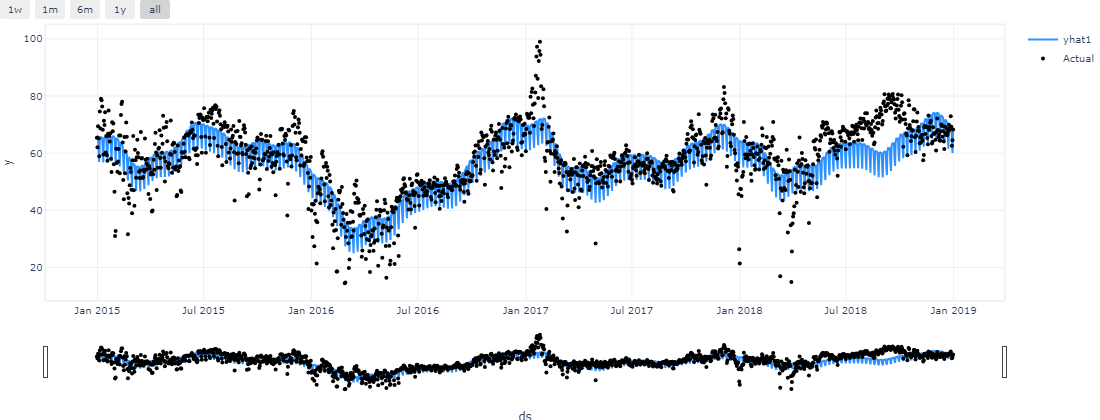

In [5]:
forecast = m.predict(df)
m.plot(forecast)

# 재현

* 가중치의 최적화하는 과정에서 초기값은 랜덤하게 설정하기 때문에 동일한 데이터라도 수행할 때마다 결과가 미세하게 다를 수 있다.
* 동일한 결과 생성을 위해 랜덤시드를 활용한다.

In [6]:
from neuralprophet import set_random_seed

set_random_seed(0)

In [7]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Load the dataset from the CSV file using pandas
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet()
m.set_plotting_backend("plotly")
df_train, df_val = m.split_df(df, valid_p=0.2)
metrics = m.fit(df_train, validation_df=df_val, progress=None)
metrics

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,32.465385,40.253788,0.420504,0.0,0,0.497496,0.0,48.755859,58.549351,0.497535,0.0
1,27.798189,33.827862,0.336897,0.0,1,0.360191,0.0,37.884930,46.531700,0.359522,0.0
2,26.229404,32.063293,0.317135,0.0,2,0.254831,0.0,29.166016,35.954082,0.253621,0.0
3,23.159628,26.816910,0.259952,0.0,3,0.178396,0.0,22.840099,28.244394,0.177566,0.0
4,16.349342,18.822329,0.150301,0.0,4,0.121196,0.0,17.959154,22.835196,0.120999,0.0
...,...,...,...,...,...,...,...,...,...,...,...
105,7.445685,9.480095,0.042117,0.0,105,0.013876,0.0,4.586117,6.230104,0.013801,0.0
106,7.428514,9.466028,0.041969,0.0,106,0.013881,0.0,4.597966,6.200996,0.013953,0.0
107,7.452650,9.505562,0.042321,0.0,107,0.013857,0.0,4.594718,6.206319,0.013846,0.0
108,7.401388,9.447571,0.041811,0.0,108,0.013867,0.0,4.589235,6.251384,0.013857,0.0


# 최종 성능 측정

In [8]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 난수 시드를 설정하여 재현성 확보
set_random_seed(0)

# CSV 파일에서 데이터셋을 pandas를 이용해 불러옴
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

# 오류가 아닌 경우 로깅 메시지 비활성화
set_log_level("ERROR")

# 모델과 예측 생성
m = NeuralProphet()
m.set_plotting_backend("plotly")

# 데이터셋을 훈련 및 검증 데이터로 분할
train_size = int(0.8 * len(df))
df_train = df[:train_size]  # 처음 80%를 훈련 데이터로 사용
df_val = df[train_size:]    # 나머지 20%를 검증 데이터로 사용

# 모델을 훈련 데이터로 학습
metrics = m.fit(df_train, validation_df=df_val, progress=None)

# 훈련된 모델로 예측 수행
forecast = m.predict(df_val)

# 예측 시각화
m.plot(forecast)

# 검증 데이터에 대한 모델 성능 평가
actual = df_val['y'].values
predicted = forecast['yhat1'].values  # 예측된 값의 열 이름에 따라 조정

mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)

# 아래 두 지표 모두 값이 낮을 수록 좋은 성능을 보인다.
print(f"평균 제곱 오차: {mse:.2f}")
print(f"평균 절대 오차: {mae:.2f}")

Finding best initial lr:   0%|          | 0/227 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\user\anaconda3\Lib\site-packages\pytorch_lightning\utilities\data.py:78: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 17. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - C:\Users\user\anaconda3\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




평균 제곱 오차: 88.24
평균 절대 오차: 7.35


# 미래데이터 예측

WARNING - (py.warnings._showwarnmsg) - C:\Users\user\anaconda3\Lib\site-packages\neuralprophet\data\split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


WARNING - (py.warnings._showwarnmsg) - C:\Users\user\anaconda3\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




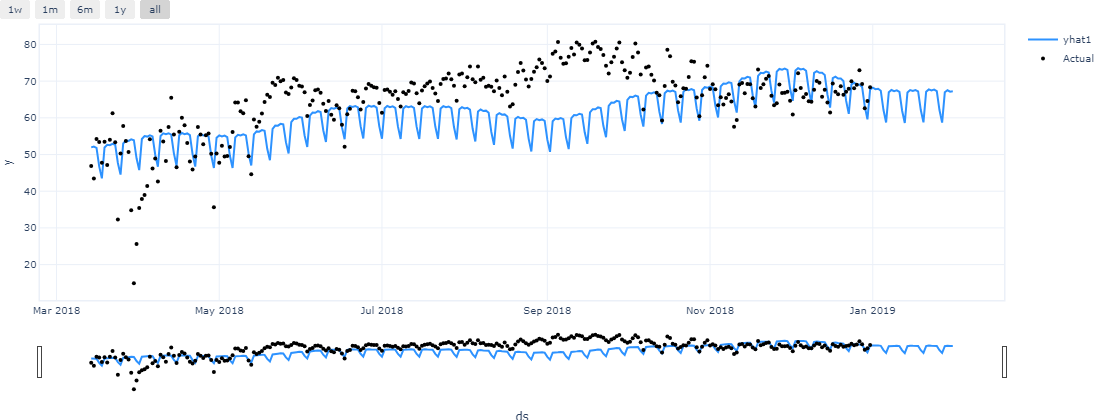

In [9]:
# 미래 날짜 데이터 프레임 생성 (2019년 1월 1일부터 31일까지)
future = m.make_future_dataframe(df_val, periods=31, n_historic_predictions=len(df_train))

# 예측 수행
forecast = m.predict(future)

# 예측 결과 플로팅
fig = m.plot(forecast)
fig.show()

In [10]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
319,2019-01-27,NaN,58.715652,62.103973,3.275319,-6.663637
320,2019-01-28,NaN,66.959587,62.113770,3.202458,1.643362
321,2019-01-29,NaN,67.517181,62.123558,3.112881,2.280743
322,2019-01-30,NaN,67.138382,62.133354,3.004057,2.000971
323,2019-01-31,NaN,67.246269,62.143150,2.876162,2.226959


In [11]:
forecast_analysis = forecast.copy()
# ds 컬럼을 datetime 타입으로 변환
forecast_analysis['ds'] = pd.to_datetime(forecast_analysis['ds'])

# 2019년 1월 1일 이후의 데이터 필터링
filtered_forecast = forecast_analysis[forecast_analysis['ds'] >= '2019-01-01']
filtered_forecast.head()

,ds,y,yhat1,trend,season_yearly,season_weekly
293,2019-01-01,NaN,68.221245,61.849327,4.093010,2.278905
294,2019-01-02,NaN,67.807167,61.859123,3.947183,2.000859
295,2019-01-03,NaN,67.916504,61.868919,3.816304,2.231280
296,2019-01-04,NaN,67.391205,61.878716,3.700660,1.811831
297,2019-01-05,NaN,62.190392,61.888504,3.600445,-3.298560


* yhat1: 예측값